<h1>2014-2015 NBA 3-PT Shooting Analysis</h1>

<h2>Read Data</h2>

In [1]:
import pandas as pd
shot_logs = pd.read_csv("shot_logs.csv")

<h2>Filter for 3pt Shots</h2>
<p>Slim down the dataframe for only 3pt Shots</p>

In [2]:
is3pt_shot = shot_logs["PTS_TYPE"]==3
shot_3pt_logs = shot_logs[is3pt_shot]

<h2> Players for Analysis </h2>

In [3]:
players_file = open('players.txt', 'r')
players = players_file.read().split(',')
players_file.close()

In [5]:
def checkPlayerForData(player):
    isPlayer_shots = shot_3pt_logs['player_name']==player
    player_shots = shot_3pt_logs[isPlayer_shots]
    
    if(player_shots.shape[0]>0):
        ret = True
    else:
        ret = False
    
    return ret

top_3pt_shooters = [player for player in players if checkPlayerForData(player)]

<h2>Accumlate Player Game Stats</h2>

In [6]:
top_3pt_shooter_df = pd.DataFrame()
for player in top_3pt_shooters:
    isPlayer_shots = shot_3pt_logs['player_name']== player
    player_shots = shot_3pt_logs[isPlayer_shots]
    top_3pt_shooter_df = top_3pt_shooter_df.append(player_shots)

<h2>Compute 3pt Shot Percentage</h2>

In [11]:
shot_pct_3pt_dict = {}
close_def_dist_avg_dict = {}

for player in top_3pt_shooters:
    isPlayer_shots = shot_3pt_logs['player_name']==player
    player_shots = shot_3pt_logs[isPlayer_shots]
    
    #3pt shooting pct calculation
    isMade_shot = player_shots['SHOT_RESULT']=='made'
    made_shot_df = player_shots[isMade_shot]
    
    fg_attempted = player_shots.shape[0]
    fg_made = made_shot_df.shape[0]
    
    shot_pct_3pt_dict[player] = (round(fg_made/fg_attempted,3))
    
    
    #avg defender distance calculation
    cumulative_def_dist = player_shots['CLOSE_DEF_DIST'].sum()
    
    close_def_dist_avg_dict[player] = (round(cumulative_def_dist/fg_attempted, 3))
    

#Note: These 3pt percentages are different than the ones listed on baseketball-refernce.com. Suggests that the dataset is incomplete

<h2>Calculate League Averages</h2>

In [8]:
league_isMade_shot = shot_3pt_logs['SHOT_RESULT']=='made'
league_made_shot_df = shot_3pt_logs[league_isMade_shot]

league_avg_3pt_pct = round(league_made_shot_df.count()[13]/shot_3pt_logs.shape[0],3)
shot_pct_3pt_dict['league'] = league_avg_3pt_pct


league_avg_dist_def = round(shot_3pt_logs["CLOSE_DEF_DIST"].sum()/shot_3pt_logs.shape[0],3)
close_def_dist_avg_dict['league'] = league_avg_dist_def

print("league_avg_3pt_pct:", league_avg_3pt_pct)
print("league_avg_dist_def:", league_avg_dist_def)


league_avg_3pt_pct: 0.352
league_avg_dist_def: 6.026


<h2>Graph the Results</h2>

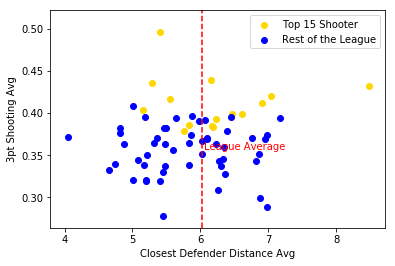

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#dict.keys returns the keys in the order that they were added to the dict.
x = [close_def_dist_avg_dict[key] for key in close_def_dist_avg_dict.keys()]
y = [shot_pct_3pt_dict[key] for key in shot_pct_3pt_dict.keys()]

count = 0
plt.scatter(x[:15],y[:15],marker='o', color = "gold", label='Top 15 Shooter')
plt.scatter(x[15:],y[15:],marker='o',color='blue', label="Rest of the League")

#Annotations
plt.axvline(x[-1], color='red',linestyle='dashed')

plt.annotate('League Average', xy=(x[-1],y[-1]), xytext=((x[-1]+.02),(y[-1]+.005)), color='red')

plt.xlabel("Closest Defender Distance Avg")
plt.ylabel("3pt Shooting Avg")
#Legend
plt.legend()
plt.show()

<h2>Discussion</h2>

One thing that we should notice when looking at our resulting graph is the are blue points which appear above some of gold points. This should be impossible to occur since this would suggest that one of the blue points is would in fact be a Top 15 Shooter. This could be explained by our inital dataset being incomplete and missing some data. I assume this to be true since the Top 15 shooter list was taken from "basketball-reference.com" a reliable source on the subject. <br> <br>
Some other important points to note are two outliers that we see in the graph representation of our data. The first is the most vertical gold point. This point which appears to have almost .05 shooting pct better than anyone else is in fact Kyle Korver. In the 2014-15 season, Kyle Korver's 3pt shooting percentage was the 9th best of all time (basketball-reference.com). Even more impressively his 3pt shot attempts had less than the average amount of defenseive distance per shot than the average 3pt shot attmept in the league. <br> <br>
The last point of discussion is the most horizontal point which appears to be an outlier in terms of the average distance of the closest defender during his 3pt shot attempt. This player is Harrison Barnes and in the following year both his 3pt Field Goal percetage dropped as did his number of attempts. This might imply that in the following year teams began to defend him closer to the league average and as a result his stats dropped. A possible reason for why he was not guarded as closely as the league average is that two of the other top 15 shooters in the league where his teammates: Steph Curry and Klay Thompson.